<a href="https://colab.research.google.com/github/profshai/Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

### Import Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import dataset

In [2]:
from google.colab import files
files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


{'Position_Salaries.csv': b'Position,Level,Salary\r\nBusiness Analyst,1,45000\r\nJunior Consultant,2,50000\r\nSenior Consultant,3,60000\r\nManager,4,80000\r\nCountry Manager,5,110000\r\nRegion Manager,6,150000\r\nPartner,7,200000\r\nSenior Partner,8,300000\r\nC-level,9,500000\r\nCEO,10,1000000'}

In [3]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

### Train Linear Regression model on whole dataset

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

### Train Polynomial regression model on whole dataset

In [13]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4)
X_poly = pf.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)
y_pred2 = lr2.predict(X_poly)

### Visualize Linear Regression model

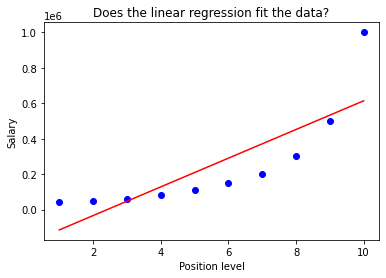

In [10]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.title('Does the linear regression fit the data?')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The model is cleary not fitting the data. Let's try the polynomial regression model

### Visualize Polynomial Regression model

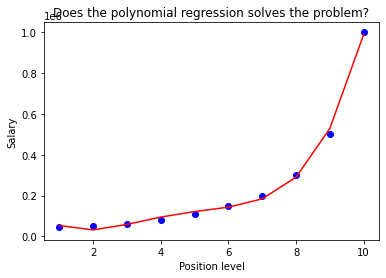

In [14]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred2, color = 'red')
plt.title('Does the polynomial regression solves the problem?')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The Polynomial regression model with a degree of 4 is more suited to the data.



### Visualising the Polynomial regression result for higher resolution and smoother curve

In [16]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_poly = pf.fit_transform(X_grid)
y_pred3 = lr2.predict(X_poly)

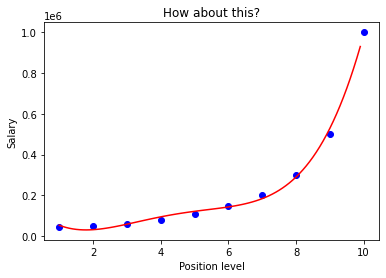

In [17]:
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, y_pred3, color = 'red')
plt.title('How about this?')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Predict a new result with Linear Regression

In [18]:
# X needs to be an array, hence the 2 square brackets (row and column)
lr.predict([[6.5]])
# Cleary, this is a wrong prediction

array([330378.78787879])

### Predict a new result with Polynomial Regression

In [20]:
lr2.predict(pf.fit_transform([[6.5]]))

array([158862.45265155])